**Step 1: Load image data from MNIST:**

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


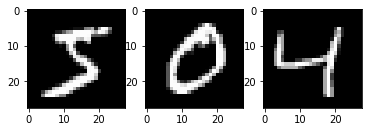

In [1]:
#import dataset
from keras.datasets import mnist 
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset into train and test sets.
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
# plot 3 images as gray scale
plt.subplot(131)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(132)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(133)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()




```
# This is formatted as code
```

**step 2: Import libraries and modules:**



In [0]:
# import the Sequential model type from Keras.This is simply a linear stack of neural network layers
from keras.models import Sequential 
# import the "core" layers from Keras. These are the layers that are used in almost any neural network
from keras.layers import Dense, Activation 
# import some utilities. This will help us transform our data later
from keras.utils import np_utils

**Step 3: Preprocess input data for Keras:**

In [3]:
# We can look at the shape of the dataset
print (X_train.shape)

(60000, 28, 28)


In [0]:
# we want to transform our dataset from having shape (n, width, height) to (n, 784) 28*28*1. 2D to 1D or flat
# The next step for the input data is to convert our data type to float32. 
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')

In [0]:
# normalize inputs from 0-255 to 0-1 (normalize our data values to the range [0, 1].)

X_train = X_train / 255
X_test = X_test / 255

**Step 4: Preprocess class labels for Keras:**

In [6]:
# Lables(y_train and y_test) are not split into 10 distinct class labels
print (y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [0]:
# One hot encode outputs - Convert 1-dimensional class arrays to 10-dimensional class matrices
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [8]:

print (y_train.shape)

(60000, 10)


**Step 5:  Define model architecture:**

In [9]:
model = Sequential([
    Dense(10,input_shape=(784,)),
    Activation('softmax'),
])
model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


** *italicized text*Step 6: Compile model:**

In [10]:
# We just need to compile the model and we'll be ready to train it.
# When we compile the model, we declare the loss function and the optimizer (SGD, Adam, etc.).
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

**Step 7: Fit model on training data:**

In [0]:
# To fit the model, all we have to do is declare the batch size and number of epochs to train for, then pass in our training data.
model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs=10, batch_size=100, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 12s 195us/step - loss: 0.6209 - acc: 0.8453 - val_loss: 0.3635 - val_acc: 0.9026
Epoch 2/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.3466 - acc: 0.9043 - val_loss: 0.3092 - val_acc: 0.9140
Epoch 3/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.3097 - acc: 0.9137 - val_loss: 0.2900 - val_acc: 0.9190
Epoch 4/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.2926 - acc: 0.9182 - val_loss: 0.2796 - val_acc: 0.9218
Epoch 5/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.2823 - acc: 0.9212 - val_loss: 0.2745 - val_acc: 0.9229
Epoch 6/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.2749 - acc: 0.9230 - val_loss: 0.2741 - val_acc: 0.9247
Epoch 7/10
60000/60000 [

**Step 8: Evaluate model on test data:**

In [0]:
# Finally, we can evaluate our model on the test data:
score = model.evaluate(X_test, y_test, verbose=0)
print (score)